# Regression(회귀)
= 예측

## KNN 회귀
가장 가까운 k개를 가지고 새로운 데이터를 예측

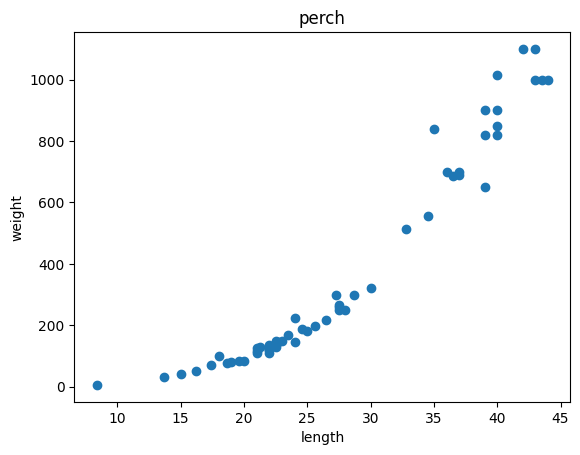

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 농어
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch')
plt.show()

In [30]:
# 해야할일1. 쪼개기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

X_train = X_train.reshape(-1, 1)  # -1은 알아서 채우라는 의미
X_test = X_test.reshape(-1, 1)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.992809406101064

## 과대적합, 과소적합
- 과대적합(Overfitting)
  - 훈련 세트 점수 >> 테스트 점수, 너무 훈련세트에 특화된 모델
- 과소적합(underfitting)
  - 테스트 점수 >> 훈련 세트 점수
  - 그냥 점수가 낮을 때

In [76]:
# 과소적합 해결
knr.n_neighbors = 5
print(knr.score(X_train, y_train), knr.score(X_test, y_test))  # 테스트 점수만 과하게 적합하면(과소적합) 모델링을 단순화해서 테스트 점수를 낮추고, 훈련점수를 올려봐야함

knr.n_neighbors = 3  # 모델링의 단순화
print(knr.score(X_train, y_train), knr.score(X_test, y_test))  # 훈련 점수가 증가, 테스트 점수는 감소

0.9698823289099254 0.992809406101064
0.9804899950518966 0.9746459963987609


[1033.33333333]


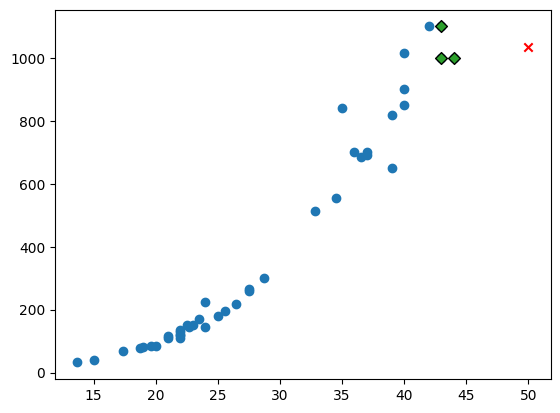

In [106]:
# KNR의 한계

new_weight = 50
print(knr.predict([[new_weight]]))
distances, indexes = knr.kneighbors([[new_weight]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D', edgecolors='black', color='tab:green')
plt.scatter(new_weight, knr.predict([[new_weight]]), marker='x', color='red')
plt.show()
# new_weight가 45를 넘어가는 순간, 예측값은 전부 똑같아짐
# 데이터 너머의 값을 계산할 수 없다 -> 새로 예측하고자 하는 데이터가 훈련 데이터를 넘어가면 못써먹음(훈련데이터 안쪽은 괜찮다)

## Linear Regression(선형회귀)
훈련 데이터와 가장 거리가 가까운 직선을 긋는다

y = ax + b를 그려주면 되는데, 선형회귀는 a와 b를 구하는 과정

y = 39.01714496363019x + -709.0186449535474
예측값: [1241.83860323]
Train score: 0.9398463339976041
Test score: 0.824750312331356


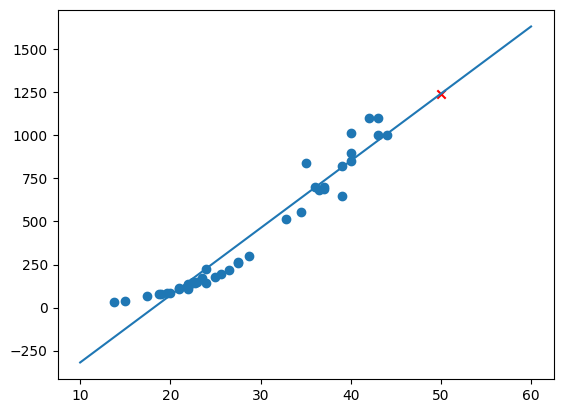

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
# 기울기, 절편
print(f'y = {lr.coef_[0]}x + {lr.intercept_}')
# 예측값
print('예측값:',lr.predict([[50]]))
# 점수
print('Train score:', lr.score(X_train, y_train))
print('Test score:', lr.score(X_test, y_test))


plt.scatter(X_train, y_train)
plt.plot([10, 60], [10 * lr.coef_ + lr.intercept_, 60 * lr.coef_ + lr.intercept_])
plt.scatter(new_weight, lr.predict([[new_weight]]), marker='x', color='red')
plt.show()

# 문제 1: train, test 둘 다 낮음(과소적합)
# 문제 2: 예측 무게가 음수가 나옴
# ==> 함수 차수를 올려서 모델링을 복잡하게 만들어보고 싶어짐

## 다항회귀

y와 X 간 관계를 linear처럼 일차식이 아니라 다항식으로 표현하는 방식

In [107]:
# 2차함수 / 새로운 길이제곱의 항을 새로 추가해서 다항식으로 만듦
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
new_weight = 50
print('예측값:', lr.predict([[new_weight ** 2, new_weight]]))
print(f'y = {lr.coef_[0]}x^2 + {lr.coef_[1]}x + {lr.intercept_}')
print('Train score:', lr.score(X_train_poly, y_train))
print('Test score:', lr.score(X_test_poly, y_test))  

# 점수가 훨씬 올라감
# 조금 더 복잡하게 해서 훈련 점수를 올려보고 싶음

예측값: [1573.98423528]
y = 1.0143321093767301x^2 + -21.55792497883735x + 116.05021078278264
Train score: 0.9706807451768623
Test score: 0.9775935108325122


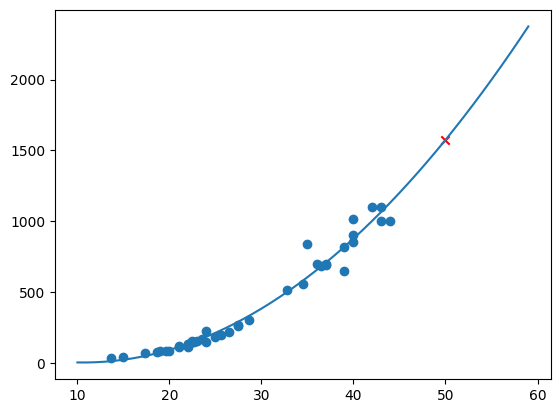

In [102]:
point = np.arange(10, 60)
plt.scatter(X_train, y_train)
plt.plot(point, lr.coef_[0] * point**2 + lr.coef_[1] * point + lr.intercept_)
plt.scatter(new_weight, lr.predict([[new_weight ** 2, new_weight]]), marker='x', color='red')
plt.show()